# Continuous Control

---

DDPG implementation to solve the Unity Agents Reacher environment

### 1. Start the Environment

Code is run from Udacity server environment, the custom Python package is imported first.

In [7]:
!pip -q install ./python

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [8]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64', worker_id=14)

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Unity environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [9]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment, key information is the number of agents and size of each action.

In [10]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [11]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, the environment can be clsoed, but this is commented out to go to the next step and train the agent.

In [12]:
# env.close()

### 4. Solution Implementation

This includes the environment insatiation and definition of the ddpg function.
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

### 4.1. Insatiate the Environment

In [26]:
from collections import deque
from itertools import count
import time
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent
import random

### 4.2. Train the Agent

In [64]:
'''For easier debugging and training, the key hyperparameters
are defined and called directly here and then referenced in the
Agent() function below.
'''
n_episodes = 400
max_t = 1000
BUFFER_SIZE = 1e5

# Agent Parameters
BATCH_SIZE = 128
GAMMA = 0.99
TAU = 1e-3
LR_ACTOR = 1e-4
LR_CRITIC = 1e-4
CRITIC_WEIGHT_DECAY = 0

# Neural Network parameters
fc1_units = 300
fc2_units = 150
seed = 40

In [65]:
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents,
               random_seed=seed, fc1_units=fc1_units, fc2_units=fc2_units, BUFFER_SIZE=BUFFER_SIZE,
               BATCH_SIZE=BATCH_SIZE, GAMMA=GAMMA, TAU=TAU, LR_ACTOR=LR_ACTOR,
               LR_CRITIC=LR_CRITIC, CRITIC_WEIGHT_DECAY=CRITIC_WEIGHT_DECAY)

In [66]:
# DDPG function 003 test
# Initially run to 50 episodes to debug and see learning trend without killing the kernel process.

def ddpg(n_episodes=n_episodes, max_t=max_t):
    
    scores_deque = deque(maxlen=100)
    scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(state, action, rewards, next_state, dones)
            state = next_state
            score += rewards
            if np.any(dones):
                print('\tSteps: ', t)
                break 
        
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.3f}'.format(i_episode, np.mean(scores_deque), np.mean(score)), end="")
        #print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")

        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_reacher_20.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_reacher_20.pth')   
            
            #break
    
    return scores

In [67]:
scores = ddpg()

Episode 100	Average Score: 5.67	Score: 16.420
Episode 200	Average Score: 26.93	Score: 30.610
Episode 226	Average Score: 30.06	Score: 34.850
Environment solved in 126 episodes!	Average Score: 30.06
Episode 227	Average Score: 30.12	Score: 32.860
Environment solved in 127 episodes!	Average Score: 30.12
Episode 228	Average Score: 30.16	Score: 31.680
Environment solved in 128 episodes!	Average Score: 30.16
Episode 229	Average Score: 30.18	Score: 28.530
Environment solved in 129 episodes!	Average Score: 30.18
Episode 230	Average Score: 30.30	Score: 39.200
Environment solved in 130 episodes!	Average Score: 30.30
Episode 231	Average Score: 30.39	Score: 33.630
Environment solved in 131 episodes!	Average Score: 30.39
Episode 232	Average Score: 30.47	Score: 34.220
Environment solved in 132 episodes!	Average Score: 30.47
Episode 233	Average Score: 30.57	Score: 36.890
Environment solved in 133 episodes!	Average Score: 30.57
Episode 234	Average Score: 30.71	Score: 36.540
Environment solved in 134 ep

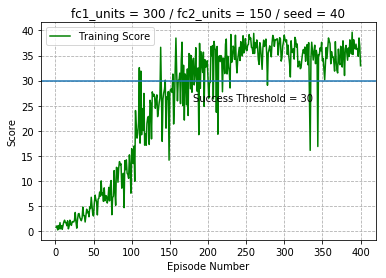

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(np.arange(1, len(scores)+1), scores,'g', label='Training Score')
plt.title('fc1_units = 300 / fc2_units = 150 / seed = 40')

plt.annotate('Success Threshold = 30', xy=(250, 30), xytext=(180, 26))
# Draw a default hline at y=1 that spans the xrange
plt.axhline(y=30)

plt.ylabel('Score')
plt.xlabel('Episode Number')
plt.legend(loc='upper left');
plt.grid(linestyle = '--')
plt.show()

In [39]:
env.close()